<a href="https://colab.research.google.com/github/EliseuODaniel/smart_cities/blob/main/smart_cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do dataset de Acidentes em Rodovias Federais do Brasil

Dataset disponível em: https://www.kaggle.com/mcamera/brazil-highway-traffic-accidents/version/7

### 1 - Tratamento dos Dados

In [ ]:
# Carregando os módulos e pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime as dt
from sklearn.preprocessing import MinMaxScaler 
%matplotlib inline

In [ ]:
# Carregando os datasets sobre as ocorrências dos acidentes
df2017 = pd.read_csv('/content/drive/MyDrive/smart cities/datatran2017.csv', sep = ';', encoding = 'latin-1')
df2018 = pd.read_csv('/content/drive/MyDrive/smart cities/datatran2018.csv', sep = ';', encoding = 'latin-1')
df2019 = pd.read_csv('/content/drive/MyDrive/smart cities/datatran2019.csv', sep = ';', encoding = 'latin-1')
df2020 = pd.read_csv('/content/drive/MyDrive/smart cities/datatran2020.csv', sep = ';', encoding = 'latin-1')
df2021 = pd.read_csv('/content/drive/MyDrive/smart cities/datatran2021.csv', sep = ';', encoding = 'latin-1')

# Unir os dados em um único dataset
# Limpe o índice existente e redefina-o no resultado definindo a opção ignore_index como True.
ocorrencias = pd.concat([df2017,df2018,df2019,df2020,df2021], ignore_index=True)

In [ ]:
# Excluindo algumas colunas do DataFrame
ocorrencias = ocorrencias.drop(['id', 'fase_dia', 'km', 'sentido_via', 'tracado_via', 'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 
                                'ilesos', 'ignorados', 'feridos', 'veiculos', 'regional', 'delegacia', 'uop'], axis=1)




# Criando duas novas colunas 'mes' e 'ano'
ocorrencias.insert(1, 'mes', 0)
ocorrencias.insert(2, 'ano', 0)

ocorrencias['data_inversa'] = pd.to_datetime(ocorrencias['data_inversa'])
ocorrencias['mes'] = ocorrencias['data_inversa'].dt.month
ocorrencias['ano'] = ocorrencias['data_inversa'].dt.year
ocorrencias['horario'] = pd.to_datetime(ocorrencias['horario']).dt.hour
ocorrencias['latitude'] = ocorrencias[['latitude']].applymap(lambda x: x.replace(',', '.'))
ocorrencias['longitude'] = ocorrencias[['longitude']].applymap(lambda x: x.replace(',', '.'))
ocorrencias['latitude'] = ocorrencias['latitude'].astype(float)
ocorrencias['longitude'] = ocorrencias['longitude'].astype(float)

# Selecionando somente os acidentes ocorridos no estado de SC
ocorrencias = ocorrencias.loc[ocorrencias['uf'] == 'SC']
ocorrencias

,data_inversa,mes,ano,dia_semana,horario,uf,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,condicao_metereologica,tipo_pista,latitude,longitude
1,2017-01-01,1,2017,domingo,0,SC,101.0,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Chuva,Dupla,-27.810100,-48.635700
4,2017-01-01,1,2017,domingo,0,SC,280.0,CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Chuva,Simples,-26.446752,-49.201670
14,2017-01-01,1,2017,domingo,1,SC,101.0,BIGUACU,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Chuva,Dupla,-27.464225,-48.641842
15,2017-01-01,1,2017,domingo,2,SC,101.0,JOINVILLE,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Chuva,Dupla,-26.348700,-48.857400
21,2017-01-01,1,2017,domingo,1,SC,280.0,TRES BARRAS,Ingestão de Álcool,Colisão traseira,Sem Vítimas,Nublado,Simples,-26.183500,-50.336936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320714,2021-06-19,6,2021,sábado,9,SC,163.0,SAO MIGUEL DO OESTE,Acesso irregular,Colisão frontal,Com Vítimas Feridas,Garoa/Chuvisco,Dupla,-26.741327,-53.501206
320717,2021-06-29,6,2021,terça-feira,6,SC,101.0,ARARANGUA,Desrespeitar a preferência no cruzamento,Colisão transversal,Com Vítimas Feridas,Céu Claro,Simples,-28.931121,-49.494042
320721,2021-06-13,6,2021,domingo,5,SC,101.0,BALNEARIO CAMBORIU,Reação tardia ou ineficiente do condutor,Colisão com objeto,Com Vítimas Feridas,Nublado,Múltipla,-27.023974,-48.607616
320723,2021-06-20,6,2021,domingo,9,SC,470.0,ASCURRA,Pista esburacada,Colisão lateral sentido oposto,Com Vítimas Feridas,Nublado,Simples,-26.971420,-49.366870


In [ ]:
#remoção de latitudes e longitudes outliers
ocorrencias = ocorrencias.drop(ocorrencias.index[[55, 268]])

In [ ]:
ocorrencias = ocorrencias.iloc[5:,]

In [ ]:
# Quantidade de linhas e colunas do DataFrame
ocorrencias.shape

(38674, 15)

In [ ]:
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38674 entries, 24 to 320733
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_inversa            38674 non-null  datetime64[ns]
 1   mes                     38674 non-null  int64         
 2   ano                     38674 non-null  int64         
 3   dia_semana              38674 non-null  object        
 4   horario                 38674 non-null  int64         
 5   uf                      38674 non-null  object        
 6   br                      38630 non-null  float64       
 7   municipio               38674 non-null  object        
 8   causa_acidente          38674 non-null  object        
 9   tipo_acidente           38674 non-null  object        
 10  classificacao_acidente  38674 non-null  object        
 11  condicao_metereologica  38674 non-null  object        
 12  tipo_pista              38674 non-null  obje

In [ ]:
# Resumo estatístico do DataFrame
ocorrencias.describe()

,mes,ano,horario,br,latitude,longitude
count,38674.000000,38674.000000,38674.000000,38630.000000,38674.000000,38674.000000
mean,6.256788,2018.615995,12.980245,218.731996,-27.228374,-49.444730
std,3.489273,1.327290,6.041104,140.483456,0.780395,3.947402
min,1.000000,2017.000000,0.000000,101.000000,-29.331361,-408.654531
25%,3.000000,2017.000000,8.000000,101.000000,-27.616730,-49.651845
50%,6.000000,2019.000000,14.000000,116.000000,-27.120510,-48.913200
75%,9.000000,2020.000000,18.000000,282.000000,-26.860660,-48.665100
max,12.000000,2021.000000,23.000000,486.000000,26.000000,311.389854


In [ ]:
# Verificando a existência de dados faltantes
ocorrencias.isnull().sum()

data_inversa               0
mes                        0
ano                        0
dia_semana                 0
horario                    0
uf                         0
br                        44
municipio                  0
causa_acidente             0
tipo_acidente              0
classificacao_acidente     0
condicao_metereologica     0
tipo_pista                 0
latitude                   0
longitude                  0
dtype: int64

In [ ]:
# Eliminando os dados faltantes
ocorrencias.dropna(inplace=True)

In [ ]:
ocorrencias.isnull().sum()

data_inversa              0
mes                       0
ano                       0
dia_semana                0
horario                   0
uf                        0
br                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
condicao_metereologica    0
tipo_pista                0
latitude                  0
longitude                 0
dtype: int64

In [ ]:
# Quantidade de linhas e colunas do DataFrame sem os valores nulos
ocorrencias.shape

(38630, 15)

### 2 - Visualização dos Dados

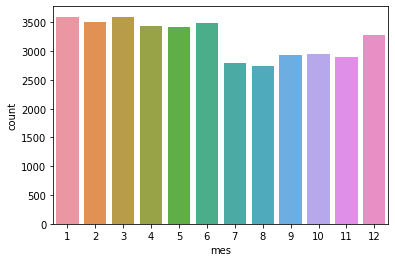

In [ ]:
# Gráfico de barra mostrando o número de acidentes em relação aos meses do ano
sns.countplot(x='mes', data=ocorrencias)

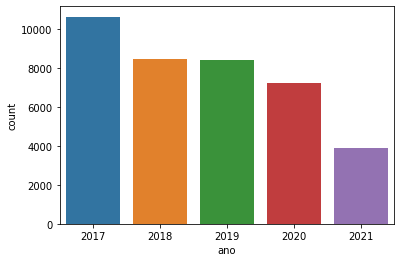

In [ ]:
# Gráfico de barra mostrando o número de acidentes em relação aos anos de 2017 a 2021
sns.countplot(x='ano', data=ocorrencias)

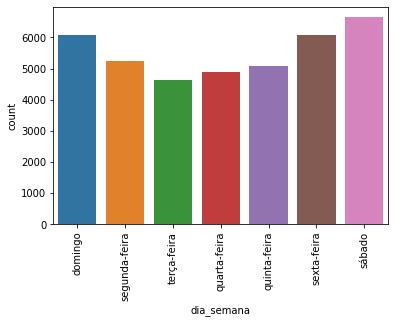

In [ ]:
# Gráfico de barra mostrando o número de acidentes em relação aos dias da semana
sns.countplot(x='dia_semana', data=ocorrencias)
plt.xticks(rotation=90);

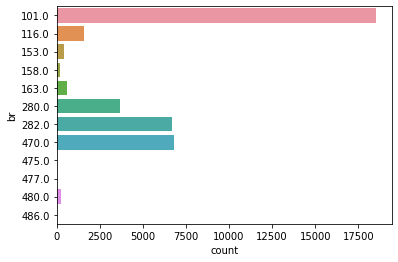

In [ ]:
# Gráfico de barra mostrando o número de acidentes em relação às rodovias
sns.countplot(y='br', data=ocorrencias)

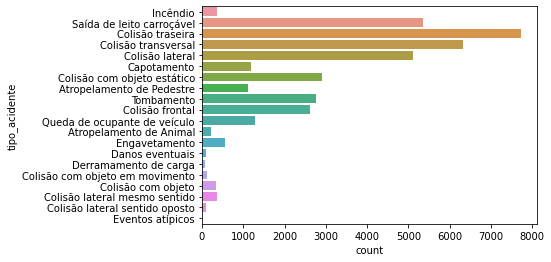

In [ ]:
# Gráfico de barra mostrando o número de acidentes em relação ao tipo
sns.countplot(y='tipo_acidente', data=ocorrencias)

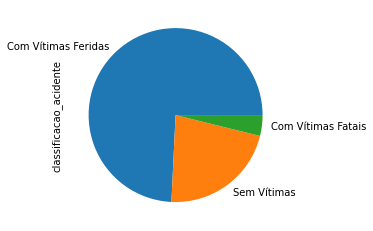

In [ ]:
# Gráfico de setores mostrando o número de acidentes em relação as classificações do acidente 
ocorrencias['classificacao_acidente'].value_counts().plot(kind='pie')

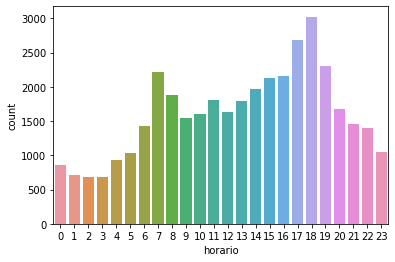

In [ ]:
# Gráfico de barras mostrando o número de acidentes em relação ao horário
sns.countplot(x='horario', data=ocorrencias)


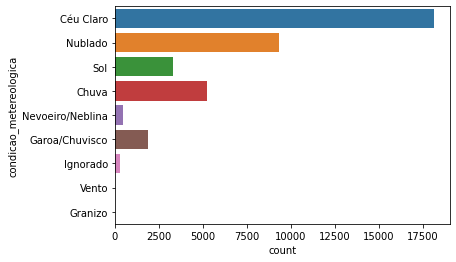

In [ ]:
# Gráfico de barra mostrando o número de acidentes em relação as condições metereológicas
sns.countplot(y='condicao_metereologica', data=ocorrencias)

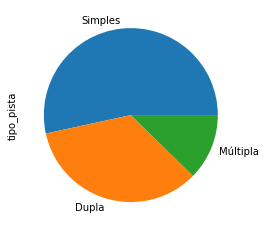

In [ ]:
# Gráfico de setores mostrando o número de acidentes em relação aos tipos de pista
ocorrencias['tipo_pista'].value_counts().plot(kind='pie')

In [ ]:
# Expressando porcentagens das ocorrências por causas do acidente
ocorrencias['causa_acidente'].value_counts(normalize=True)

Falta de Atenção à Condução                                                     0.377453
Desobediência às normas de trânsito pelo condutor                               0.107119
Velocidade Incompatível                                                         0.099767
Ingestão de Álcool                                                              0.078411
Não guardar distância de segurança                                              0.067978
                                                                                  ...   
Restrição de visibilidade em curvas verticais                                   0.000052
Área urbana sem a presença de local apropriado para a travessia de pedestres    0.000026
Modificação proibida                                                            0.000026
Pista em desnível                                                               0.000026
Semáforo com defeito                                                            0.000026
Name: causa_acidente,

In [ ]:
# Expressando porcentagens das ocorrências por municípios
ocorrencias['municipio'].value_counts(normalize=True)

SAO JOSE               0.093269
PALHOCA                0.076262
ITAJAI                 0.040487
BALNEARIO CAMBORIU     0.036164
JOINVILLE              0.034999
                         ...   
LUIZ ALVES             0.000026
SAO BONIFACIO          0.000026
FLOR DO SERTAO         0.000026
BELA VISTA DO TOLDO    0.000026
PALMA SOLA             0.000026
Name: municipio, Length: 123, dtype: float64

In [ ]:
# Install folium package
!pip install folium
import folium
from sklearn import preprocessing
import scipy
## for geospatial
import folium
import geopy
from folium.plugins import MarkerCluster

In [ ]:
locations = ocorrencias[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[-27.70775937, -48.95278403]

In [ ]:
# plotagem dos acidentes agrupados por quantidade

map2 = folium.Map(location=[-27.71624826, -48.86979461], zoom_start=7)

marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, 1000):
     folium.Marker(locationlist[point], popup=[point]).add_to(marker_cluster)
map2

In [ ]:
#plotagem de uma amostra geral dos acidentes

map = folium.Map(location=[-27.71624826, -48.86979461], zoom_start=7)
for point in range(0, 1000):
    folium.Marker(locationlist[point], popup=[point]).add_to(map)
map

In [ ]:
# criar coluna cor, correspondendo verde: sem vítimas, amarelo: com vítimas feridas e vermelho com vítimas fatais
colors = ["red","yellow", "green"]
indices = ['Com Vítimas Fatais', 'Com Vítimas Feridas', 'Sem Vítimas']
ocorrencias["cor"] = ocorrencias["classificacao_acidente"].apply(lambda x: 
               colors[indices.index(x)])

In [ ]:
map3 = folium.Map(location=[-27.71624826, -48.86979461],
                  zoom_start=8)

In [ ]:
ocorrencias_menor = ocorrencias.iloc[0:100,]

ocorrencias_menor.apply(lambda row: folium.CircleMarker(
           location=[row['latitude'],row['longitude']], 
           popup=row['classificacao_acidente'],
           color=row["cor"], fill=True).add_to(map3), axis=1)

24     <folium.vector_layers.CircleMarker object at 0...
41     <folium.vector_layers.CircleMarker object at 0...
66     <folium.vector_layers.CircleMarker object at 0...
85     <folium.vector_layers.CircleMarker object at 0...
92     <folium.vector_layers.CircleMarker object at 0...
                             ...                        
897    <folium.vector_layers.CircleMarker object at 0...
904    <folium.vector_layers.CircleMarker object at 0...
908    <folium.vector_layers.CircleMarker object at 0...
922    <folium.vector_layers.CircleMarker object at 0...
924    <folium.vector_layers.CircleMarker object at 0...
Length: 100, dtype: object

In [ ]:
#plotagem de uma amostra dos acidentes classificados por gravidade
map3